In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math
import pickle
# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys 
sys.path.append(os.path.abspath("../../src"))   
import soporte_preprocesamiento as f
import warnings
warnings.filterwarnings("ignore")


from datetime import datetime

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
pd.set_option("display.max_columns", None)
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

In [2]:
df_null_encoded=pd.read_csv("../../datos/datos3/datos_nulos_encoded.csv", index_col=0).reset_index(drop=True)

In [3]:
df_null_encoded.columns

Index(['price', 'size', 'bathrooms', 'province', 'municipality', 'distance',
       'district', 'propertyType_chalet', 'propertyType_countryHouse',
       'propertyType_duplex', 'propertyType_flat', 'propertyType_penthouse',
       'propertyType_studio', 'exterior_False', 'exterior_True', 'rooms_0',
       'rooms_1', 'rooms_2', 'rooms_3', 'rooms_4', 'status_desconocido',
       'status_good', 'status_newdevelopment', 'status_renew', 'floor_1',
       'floor_14', 'floor_2', 'floor_3', 'floor_4', 'floor_5', 'floor_6',
       'floor_7', 'floor_8', 'floor_bj', 'floor_desconocido', 'floor_en',
       'floor_ss', 'floor_st', 'hasLift_False', 'hasLift_True',
       'hasLift_desconocido', 'parkingSpace_False', 'parkingSpace_True',
       'parkingSpace_desconocido'],
      dtype='object')

In [4]:
df_null_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      428 non-null    float64
 1   size                       428 non-null    float64
 2   bathrooms                  428 non-null    float64
 3   province                   428 non-null    float64
 4   municipality               428 non-null    float64
 5   distance                   428 non-null    int64  
 6   district                   428 non-null    float64
 7   propertyType_chalet        428 non-null    float64
 8   propertyType_countryHouse  428 non-null    float64
 9   propertyType_duplex        428 non-null    float64
 10  propertyType_flat          428 non-null    float64
 11  propertyType_penthouse     428 non-null    float64
 12  propertyType_studio        428 non-null    float64
 13  exterior_False             428 non-null    float64

In [5]:
df_null_encoded.head()

,price,size,bathrooms,province,municipality,distance,district,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,status_desconocido,status_good,status_newdevelopment,status_renew,floor_1,floor_14,floor_2,floor_3,floor_4,floor_5,floor_6,floor_7,floor_8,floor_bj,floor_desconocido,floor_en,floor_ss,floor_st,hasLift_False,hasLift_True,hasLift_desconocido,parkingSpace_False,parkingSpace_True,parkingSpace_desconocido
0,750.0,60.0,677.483051,693.405172,705.594108,7037,684.900992,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,750.0,70.0,677.483051,693.405172,685.065839,16145,683.247707,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,400.0,67.0,646.960592,693.405172,637.086090,55041,592.063589,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,450.0,89.0,677.483051,582.036852,643.591514,47186,592.063589,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,450.0,60.0,677.483051,582.036852,648.070792,38237,592.063589,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:


# Definir las variables y escaladores
variables = ['price', 'size', 'bathrooms', 'province', 'municipality', 'distance',
             'district', 'propertyType_chalet', 'propertyType_countryHouse',
             'propertyType_duplex', 'propertyType_flat', 'propertyType_penthouse',
             'propertyType_studio', 'exterior_False', 'exterior_True', 'rooms_0',
             'rooms_1', 'rooms_2', 'rooms_3', 'rooms_4', 'status_desconocido',
             'status_good', 'status_newdevelopment', 'status_renew', 'floor_1',
             'floor_14', 'floor_2', 'floor_3', 'floor_4', 'floor_5', 'floor_6',
             'floor_7', 'floor_8', 'floor_bj', 'floor_desconocido', 'floor_en',
             'floor_ss', 'floor_st', 'hasLift_False', 'hasLift_True',
             'hasLift_desconocido', 'parkingSpace_False', 'parkingSpace_True',
             'parkingSpace_desconocido']

escaladores = {
    "robust": RobustScaler(),
    "MinMax": MinMaxScaler(),
    "norm": Normalizer(),
    "est": StandardScaler()
}

# Crear nuevas columnas escaladas
for esc_name, escalador in escaladores.items():
    for var in variables:
        # Transformar las variables con el escalador
        datos_transformados = escalador.fit_transform(df_null_encoded[[var]])
        # Crear una nueva columna en el DataFrame con el nombre del escalador
        df_null_encoded[f"{var}_{esc_name}"] = datos_transformados

# Visualizar la descripción del DataFrame resultante
df_null_encoded.describe().T.head()


,count,mean,std,min,25%,50%,75%,max
price,428.0,672.546729,84.625889,340.000000,640.000000,700.000000,740.000000,750.000000
size,428.0,63.299065,22.405484,20.000000,46.000000,61.000000,79.000000,149.000000
bathrooms,428.0,672.360134,11.437301,646.960592,677.483051,677.483051,677.483051,679.987281
province,428.0,672.588664,43.467080,582.036852,693.405172,693.405172,693.405172,693.405172
municipality,428.0,684.820229,20.216714,630.580666,670.073824,683.533558,705.594108,705.594108


In [7]:
df_null_encoded.head(2)

,price,size,bathrooms,province,municipality,distance,district,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,status_desconocido,status_good,status_newdevelopment,status_renew,floor_1,floor_14,floor_2,floor_3,floor_4,floor_5,floor_6,floor_7,floor_8,floor_bj,floor_desconocido,floor_en,floor_ss,floor_st,hasLift_False,hasLift_True,hasLift_desconocido,parkingSpace_False,parkingSpace_True,parkingSpace_desconocido,price_robust,size_robust,bathrooms_robust,province_robust,municipality_robust,distance_robust,district_robust,propertyType_chalet_robust,propertyType_countryHouse_robust,propertyType_duplex_robust,propertyType_flat_robust,propertyType_penthouse_robust,propertyType_studio_robust,exterior_False_robust,exterior_True_robust,rooms_0_robust,rooms_1_robust,rooms_2_robust,rooms_3_robust,rooms_4_robust,status_desconocido_robust,status_good_robust,status_newdevelopment_robust,status_renew_robust,floor_1_robust,floor_14_robust,floor_2_robust,floor_3_robust,floor_4_robust,floor_5_robust,floor_6_robust,floor_7_robust,floor_8_robust,floor_bj_robust,floor_desconocido_robust,floor_en_robust,floor_ss_robust,floor_st_robust,hasLift_False_robust,hasLift_True_robust,hasLift_desconocido_robust,parkingSpace_False_robust,parkingSpace_True_robust,parkingSpace_desconocido_robust,price_MinMax,size_MinMax,bathrooms_MinMax,province_MinMax,municipality_MinMax,distance_MinMax,district_MinMax,propertyType_chalet_MinMax,propertyType_countryHouse_MinMax,propertyType_duplex_MinMax,propertyType_flat_MinMax,propertyType_penthouse_MinMax,propertyType_studio_MinMax,exterior_False_MinMax,exterior_True_MinMax,rooms_0_MinMax,rooms_1_MinMax,rooms_2_MinMax,rooms_3_MinMax,rooms_4_MinMax,status_desconocido_MinMax,status_good_MinMax,status_newdevelopment_MinMax,status_renew_MinMax,floor_1_MinMax,floor_14_MinMax,floor_2_MinMax,floor_3_MinMax,floor_4_MinMax,floor_5_MinMax,floor_6_MinMax,floor_7_MinMax,floor_8_MinMax,floor_bj_MinMax,floor_desconocido_MinMax,floor_en_MinMax,floor_ss_MinMax,floor_st_MinMax,hasLift_False_MinMax,hasLift_True_MinMax,hasLift_desconocido_MinMax,parkingSpace_False_MinMax,parkingSpace_True_MinMax,parkingSpace_desconocido_MinMax,price_norm,size_norm,bathrooms_norm,province_norm,municipality_norm,distance_norm,district_norm,propertyType_chalet_norm,propertyType_countryHouse_norm,propertyType_duplex_norm,propertyType_flat_norm,propertyType_penthouse_norm,propertyType_studio_norm,exterior_False_norm,exterior_True_norm,rooms_0_norm,rooms_1_norm,rooms_2_norm,rooms_3_norm,rooms_4_norm,status_desconocido_norm,status_good_norm,status_newdevelopment_norm,status_renew_norm,floor_1_norm,floor_14_norm,floor_2_norm,floor_3_norm,floor_4_norm,floor_5_norm,floor_6_norm,floor_7_norm,floor_8_norm,floor_bj_norm,floor_desconocido_norm,floor_en_norm,floor_ss_norm,floor_st_norm,hasLift_False_norm,hasLift_True_norm,hasLift_desconocido_norm,parkingSpace_False_norm,parkingSpace_True_norm,parkingSpace_desconocido_norm,price_est,size_est,bathrooms_est,province_est,municipality_est,distance_est,district_est,propertyType_chalet_est,propertyType_countryHouse_est,propertyType_duplex_est,propertyType_flat_est,propertyType_penthouse_est,propertyType_studio_est,exterior_False_est,exterior_True_est,rooms_0_est,rooms_1_est,rooms_2_est,rooms_3_est,rooms_4_est,status_desconocido_est,status_good_est,status_newdevelopment_est,status_renew_est,floor_1_est,floor_14_est,floor_2_est,floor_3_est,floor_4_est,floor_5_est,floor_6_est,floor_7_est,floor_8_est,floor_bj_est,floor_desconocido_est,floor_en_est,floor_ss_est,floor_st_est,hasLift_False_est,hasLift_True_est,hasLift_desconocido_est,parkingSpace_False_est,parkingSpace_True_est,parkingSpace_desconocido_est
0,750.0,60.0,677.483051,693.405172,705.594108,7037,684.900992,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.

In [8]:
df_null_encoded.columns


Index(['price', 'size', 'bathrooms', 'province', 'municipality', 'distance',
       'district', 'propertyType_chalet', 'propertyType_countryHouse',
       'propertyType_duplex',
       ...
       'floor_desconocido_est', 'floor_en_est', 'floor_ss_est', 'floor_st_est',
       'hasLift_False_est', 'hasLift_True_est', 'hasLift_desconocido_est',
       'parkingSpace_False_est', 'parkingSpace_True_est',
       'parkingSpace_desconocido_est'],
      dtype='object', length=220)

In [9]:
# df_num=df_sin_null.select_dtypes(np.number)
# df_num.drop(columns="price", inplace=True)
# lista_cols=df_num.columns
# lista_cols_num=lista_cols.to_list()

In [10]:
# df_robust, scaler=f.escalador_datos(df_sin_null, lista_cols_num, method = "robust")     #el scaler es para el streamlit futuro

Boxplots (Outliers) y distribuciones

In [11]:
# def boxplots_outliers_y_distribuciones(df_numerica,tamanio):
#     fig , axes = plt.subplots(nrows=len(df_numerica.columns)*2-2 , ncols=5, figsize = tamanio)
#     axes=axes.flat
    

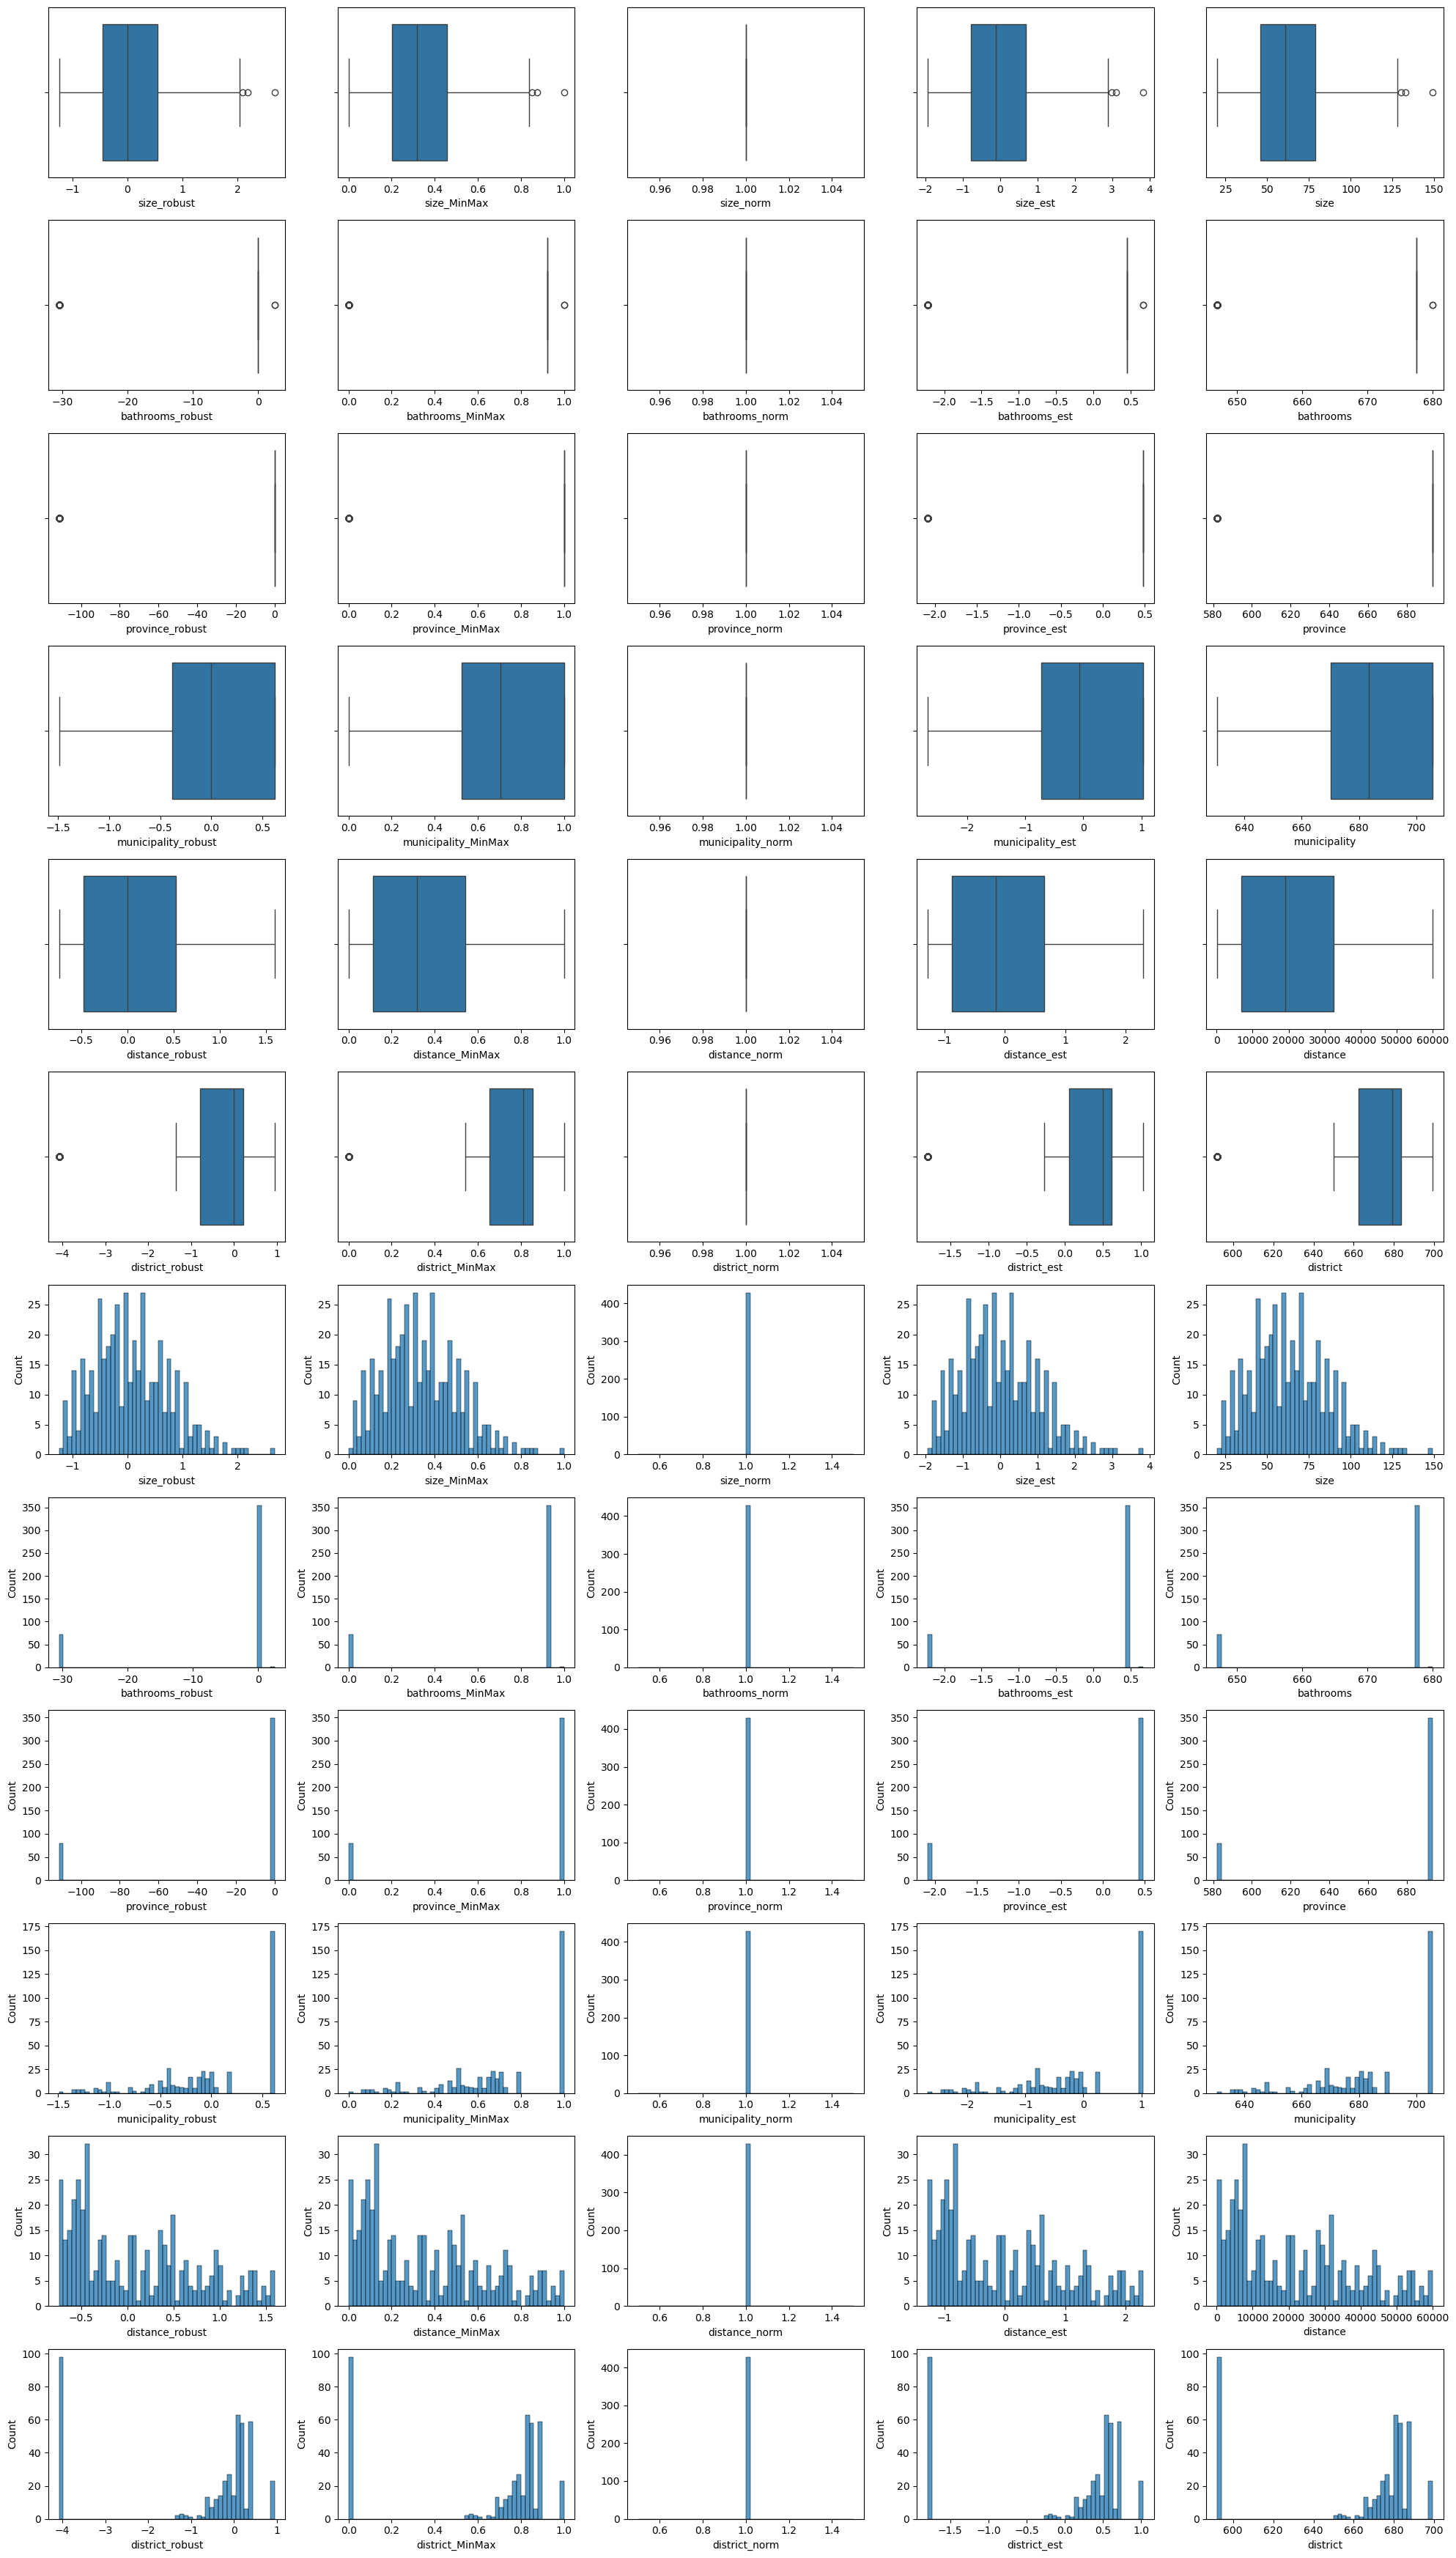

In [12]:
fig, axes = plt.subplots(nrows=12, ncols=5, figsize=(20, 35))  


sns.boxplot(x="size_robust", data=df_null_encoded, ax=axes[0][0])
sns.boxplot(x="size_MinMax", data=df_null_encoded, ax=axes[0][1])
sns.boxplot(x="size_norm", data=df_null_encoded, ax=axes[0][2])
sns.boxplot(x="size_est", data=df_null_encoded, ax=axes[0][3])
sns.boxplot(x="size", data=df_null_encoded, ax=axes[0][4])

sns.boxplot(x="bathrooms_robust", data=df_null_encoded, ax=axes[1][0])
sns.boxplot(x="bathrooms_MinMax", data=df_null_encoded, ax=axes[1][1])
sns.boxplot(x="bathrooms_norm", data=df_null_encoded, ax=axes[1][2])
sns.boxplot(x="bathrooms_est", data=df_null_encoded, ax=axes[1][3])
sns.boxplot(x="bathrooms", data=df_null_encoded, ax=axes[1][4])

sns.boxplot(x="province_robust", data=df_null_encoded, ax=axes[2][0])
sns.boxplot(x="province_MinMax", data=df_null_encoded, ax=axes[2][1])
sns.boxplot(x="province_norm", data=df_null_encoded, ax=axes[2][2])
sns.boxplot(x="province_est", data=df_null_encoded, ax=axes[2][3])
sns.boxplot(x="province", data=df_null_encoded, ax=axes[2][4])

sns.boxplot(x="municipality_robust", data=df_null_encoded, ax=axes[3][0])
sns.boxplot(x="municipality_MinMax", data=df_null_encoded, ax=axes[3][1])
sns.boxplot(x="municipality_norm", data=df_null_encoded, ax=axes[3][2])
sns.boxplot(x="municipality_est", data=df_null_encoded, ax=axes[3][3])
sns.boxplot(x="municipality", data=df_null_encoded, ax=axes[3][4])

sns.boxplot(x="distance_robust", data=df_null_encoded, ax=axes[4][0])
sns.boxplot(x="distance_MinMax", data=df_null_encoded, ax=axes[4][1])
sns.boxplot(x="distance_norm", data=df_null_encoded, ax=axes[4][2])
sns.boxplot(x="distance_est", data=df_null_encoded, ax=axes[4][3])
sns.boxplot(x="distance", data=df_null_encoded, ax=axes[4][4])

sns.boxplot(x="district_robust", data=df_null_encoded, ax=axes[5][0])
sns.boxplot(x="district_MinMax", data=df_null_encoded, ax=axes[5][1])
sns.boxplot(x="district_norm", data=df_null_encoded, ax=axes[5][2])
sns.boxplot(x="district_est", data=df_null_encoded, ax=axes[5][3])
sns.boxplot(x="district", data=df_null_encoded, ax=axes[5][4])



sns.histplot(x="size_robust", data=df_null_encoded, ax=axes[6][0], bins=50)
sns.histplot(x="size_MinMax", data=df_null_encoded, ax=axes[6][1], bins=50)
sns.histplot(x="size_norm", data=df_null_encoded, ax=axes[6][2], bins=50)
sns.histplot(x="size_est", data=df_null_encoded, ax=axes[6][3], bins=50)
sns.histplot(x="size", data=df_null_encoded, ax=axes[6][4], bins=50)

sns.histplot(x="bathrooms_robust", data=df_null_encoded, ax=axes[7][0], bins=50)
sns.histplot(x="bathrooms_MinMax", data=df_null_encoded, ax=axes[7][1], bins=50)
sns.histplot(x="bathrooms_norm", data=df_null_encoded, ax=axes[7][2], bins=50)
sns.histplot(x="bathrooms_est", data=df_null_encoded, ax=axes[7][3], bins=50)
sns.histplot(x="bathrooms", data=df_null_encoded, ax=axes[7][4], bins=50)

sns.histplot(x="province_robust", data=df_null_encoded, ax=axes[8][0], bins=50)
sns.histplot(x="province_MinMax", data=df_null_encoded, ax=axes[8][1], bins=50)
sns.histplot(x="province_norm", data=df_null_encoded, ax=axes[8][2], bins=50)
sns.histplot(x="province_est", data=df_null_encoded, ax=axes[8][3], bins=50)
sns.histplot(x="province", data=df_null_encoded, ax=axes[8][4], bins=50)

sns.histplot(x="municipality_robust", data=df_null_encoded, ax=axes[9][0], bins=50)
sns.histplot(x="municipality_MinMax", data=df_null_encoded, ax=axes[9][1], bins=50)
sns.histplot(x="municipality_norm", data=df_null_encoded, ax=axes[9][2], bins=50)
sns.histplot(x="municipality_est", data=df_null_encoded, ax=axes[9][3], bins=50)
sns.histplot(x="municipality", data=df_null_encoded, ax=axes[9][4], bins=50)

sns.histplot(x="distance_robust", data=df_null_encoded, ax=axes[10][0], bins=50)
sns.histplot(x="distance_MinMax", data=df_null_encoded, ax=axes[10][1], bins=50)
sns.histplot(x="distance_norm", data=df_null_encoded, ax=axes[10][2], bins=50)
sns.histplot(x="distance_est", data=df_null_encoded, ax=axes[10][3], bins=50)
sns.histplot(x="distance", data=df_null_encoded, ax=axes[10][4], bins=50)


sns.histplot(x="district_robust", data=df_null_encoded, ax=axes[11][0], bins=50)
sns.histplot(x="district_MinMax", data=df_null_encoded, ax=axes[11][1], bins=50)
sns.histplot(x="district_norm", data=df_null_encoded, ax=axes[11][2], bins=50)
sns.histplot(x="district_est", data=df_null_encoded, ax=axes[11][3], bins=50)
sns.histplot(x="district", data=df_null_encoded, ax=axes[11][4], bins=50)

plt.tight_layout()


Dado que en el proceso de limpieza y exploración se observaron y se seleccionaron los límites de lo que se consideraría outlier y lo que se considera datos erróneos, los outliers que nos aparecen aquí son datos reales con lo que si que me interesa mantenerlos.  
Es por ello que tras descartar el método de normalizar y el de escalado min y max. Tuve que elegir entre la metodología robusta y la estándar.  
Finalmente, me decanto por la robusta ya que le da más importancia a dichos outliers que ya hemos comprobado que son datos viables y coherentes.

*Entrando un poco más en detalle:*  
Los kilómetros no contaban con una cantidad ingente de outliers a diferencia de la potencia que contaba con una proporción muy alta.  
Es por ello que al comparar las distribuciones tanto entre métodos como con la variable original, tanto el robusto como el estandarizado se parecen tanto.  
  
Además, tienen sentido las distribuciones ya que al ser una tienda de coches usados, los kilómetros tienen sentido que se agrupen en los valores más altos al igual que tiene sentido que la potencia se agrupe en valores más bajos ya que no son habituales los coches con una potencia superior a 400.

In [13]:
df_null_encoded.columns

Index(['price', 'size', 'bathrooms', 'province', 'municipality', 'distance',
       'district', 'propertyType_chalet', 'propertyType_countryHouse',
       'propertyType_duplex',
       ...
       'floor_desconocido_est', 'floor_en_est', 'floor_ss_est', 'floor_st_est',
       'hasLift_False_est', 'hasLift_True_est', 'hasLift_desconocido_est',
       'parkingSpace_False_est', 'parkingSpace_True_est',
       'parkingSpace_desconocido_est'],
      dtype='object', length=220)

In [14]:
lista_eliminar=[
    'size_robust', 'size_norm', 'size_est',
    'bathrooms_robust', 'bathrooms_norm', 'bathrooms_est',
    'province_robust', 'province_norm', 'province_est',
    'municipality_robust', 'municipality_norm', 'municipality_est',
    'distance_robust', 'distance_norm', 'distance_est',
    'district_robust', 'district_norm', 'district_est',
    'propertyType_chalet_robust', 'propertyType_chalet_norm', 'propertyType_chalet_est',
    'propertyType_countryHouse_robust', 'propertyType_countryHouse_norm', 'propertyType_countryHouse_est',
    'propertyType_duplex_robust', 'propertyType_duplex_norm', 'propertyType_duplex_est',
    'propertyType_flat_robust', 'propertyType_flat_norm', 'propertyType_flat_est',
    'propertyType_penthouse_robust', 'propertyType_penthouse_norm', 'propertyType_penthouse_est',
    'propertyType_studio_robust', 'propertyType_studio_norm', 'propertyType_studio_est',
    'exterior_False_robust', 'exterior_False_norm', 'exterior_False_est',
    'exterior_True_robust', 'exterior_True_norm', 'exterior_True_est',
    'rooms_0_robust', 'rooms_0_norm', 'rooms_0_est',
    'rooms_1_robust', 'rooms_1_norm', 'rooms_1_est',
    'rooms_2_robust', 'rooms_2_norm', 'rooms_2_est',
    'rooms_3_robust', 'rooms_3_norm', 'rooms_3_est',
    'rooms_4_robust', 'rooms_4_norm', 'rooms_4_est',
    'status_desconocido_robust', 'status_desconocido_norm', 'status_desconocido_est',
    'status_good_robust', 'status_good_norm', 'status_good_est',
    'status_newdevelopment_robust', 'status_newdevelopment_norm', 'status_newdevelopment_est',
    'status_renew_robust', 'status_renew_norm', 'status_renew_est',
    'floor_1_robust', 'floor_1_norm', 'floor_1_est',
    'floor_14_robust', 'floor_14_norm', 'floor_14_est',
    'floor_2_robust', 'floor_2_norm', 'floor_2_est',
    'floor_3_robust', 'floor_3_norm', 'floor_3_est',
    'floor_4_robust', 'floor_4_norm', 'floor_4_est',
    'floor_5_robust', 'floor_5_norm', 'floor_5_est',
    'floor_6_robust', 'floor_6_norm', 'floor_6_est',
    'floor_7_robust', 'floor_7_norm', 'floor_7_est',
    'floor_8_robust', 'floor_8_norm', 'floor_8_est',
    'floor_bj_robust', 'floor_bj_norm', 'floor_bj_est',
    'floor_desconocido_robust', 'floor_desconocido_norm', 'floor_desconocido_est',
    'floor_en_robust', 'floor_en_norm', 'floor_en_est',
    'floor_ss_robust', 'floor_ss_norm', 'floor_ss_est',
    'floor_st_robust', 'floor_st_norm', 'floor_st_est',
    'hasLift_False_robust', 'hasLift_False_norm', 'hasLift_False_est',
    'hasLift_True_robust', 'hasLift_True_norm', 'hasLift_True_est',
    'hasLift_desconocido_robust', 'hasLift_desconocido_norm', 'hasLift_desconocido_est',
    'parkingSpace_False_robust', 'parkingSpace_False_norm', 'parkingSpace_False_est',
    'parkingSpace_True_robust', 'parkingSpace_True_norm', 'parkingSpace_True_est',
    'parkingSpace_desconocido_robust', 'parkingSpace_desconocido_norm', 'parkingSpace_desconocido_est', 'size', 'bathrooms', 'province', 'municipality', 'distance',
             'district', 'propertyType_chalet', 'propertyType_countryHouse',
             'propertyType_duplex', 'propertyType_flat', 'propertyType_penthouse',
             'propertyType_studio', 'exterior_False', 'exterior_True', 'rooms_0',
             'rooms_1', 'rooms_2', 'rooms_3', 'rooms_4', 'status_desconocido',
             'status_good', 'status_newdevelopment', 'status_renew', 'floor_1',
             'floor_14', 'floor_2', 'floor_3', 'floor_4', 'floor_5', 'floor_6',
             'floor_7', 'floor_8', 'floor_bj', 'floor_desconocido', 'floor_en',
             'floor_ss', 'floor_st', 'hasLift_False', 'hasLift_True',
             'hasLift_desconocido', 'parkingSpace_False', 'parkingSpace_True',
             'parkingSpace_desconocido','price_robust','price_MinMax','price_MinMax','price_est','price_norm']

In [ ]:
df_null_encoded.drop(columns=lista_eliminar, inplace=True)

In [16]:
df_null_encoded.head(2)

,price,size_MinMax,bathrooms_MinMax,province_MinMax,municipality_MinMax,distance_MinMax,district_MinMax,propertyType_chalet_MinMax,propertyType_countryHouse_MinMax,propertyType_duplex_MinMax,propertyType_flat_MinMax,propertyType_penthouse_MinMax,propertyType_studio_MinMax,exterior_False_MinMax,exterior_True_MinMax,rooms_0_MinMax,rooms_1_MinMax,rooms_2_MinMax,rooms_3_MinMax,rooms_4_MinMax,status_desconocido_MinMax,status_good_MinMax,status_newdevelopment_MinMax,status_renew_MinMax,floor_1_MinMax,floor_14_MinMax,floor_2_MinMax,floor_3_MinMax,floor_4_MinMax,floor_5_MinMax,floor_6_MinMax,floor_7_MinMax,floor_8_MinMax,floor_bj_MinMax,floor_desconocido_MinMax,floor_en_MinMax,floor_ss_MinMax,floor_st_MinMax,hasLift_False_MinMax,hasLift_True_MinMax,hasLift_desconocido_MinMax,parkingSpace_False_MinMax,parkingSpace_True_MinMax,parkingSpace_desconocido_MinMax
0,750.0,0.310078,0.924176,1.0,1.000000,0.114738,0.866684,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,750.0,0.387597,0.924176,1.0,0.726339,0.267209,0.851250,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [17]:
df_null_encoded.to_csv("../../datos/datos3/datos_nulos_encoded_minmax.csv")